# LDA, QDA, and logistic regression

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, neighbors, metrics
from matplotlib import patches, cm
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm, tnrange, tqdm_notebook
my_colors = [(1, 0, 0),(0, 0, 1)]
my_cm = LinearSegmentedColormap.from_list('my_cm', my_colors, N=2)

## Data generation

In [3]:
np.random.seed(2020)
N = 50 # number of data points
blue_data = np.random.multivariate_normal([2.5,0],[[2,1],[1,2]],N)
blue_labels = 1 * np.ones((N,1)) # coding blue label as one
red_data = np.random.multivariate_normal([0,2.5],[[2,1],[1,2]],N)
red_labels = 0 * np.ones((N,1)) # coding red label as zero
data = np.concatenate((blue_data,red_data),axis=0)
labels = np.concatenate((blue_labels,red_labels),axis=0)

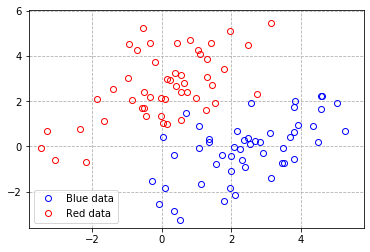

In [4]:
plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
plt.grid(b=True,linestyle="--")
leg = plt.legend(loc = "lower left")

In [5]:
# Need to create a mesh to evaluate classifier
x_grid = np.linspace(1.5*np.min(data[:,0]),1.5*np.max(data[:,0]),100)
y_grid = np.linspace(1.5*np.min(data[:,1]),1.5*np.max(data[:,1]),100)
x_mesh, y_mesh = np.meshgrid(x_grid,y_grid)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


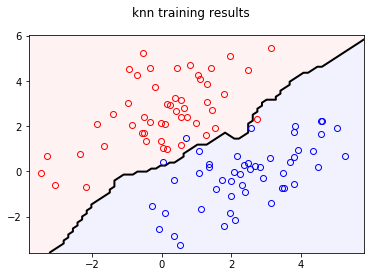

knn score = 0.97


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


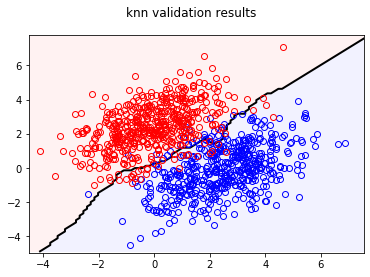

knn true loss = 0.01


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


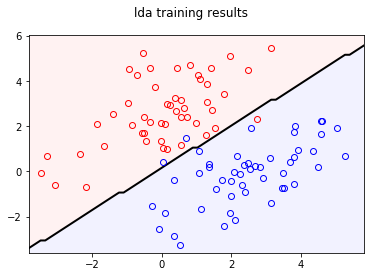

lda score = 0.97


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


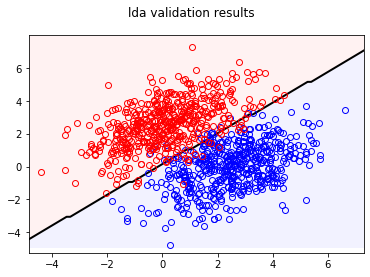

lda true loss = 0.01


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


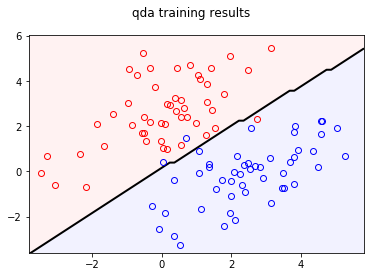

qda score = 0.97


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


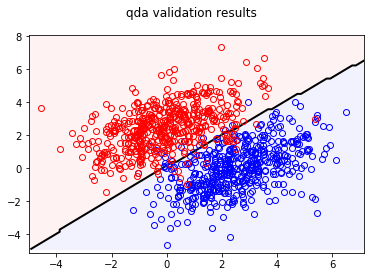

qda true loss = 0.01


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


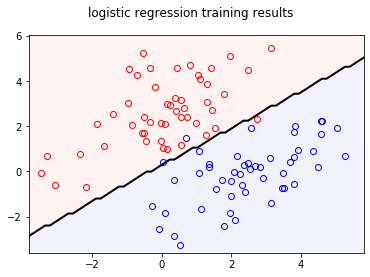

logistic regression score = 0.97


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


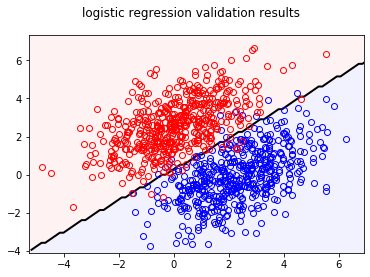

logistic regression true loss = 0.01


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Wrapper because <3 OOP
class Classifier:
    __models ={'knn':neighbors.KNeighborsClassifier,
                   'lda':LinearDiscriminantAnalysis,
                   'qda':QuadraticDiscriminantAnalysis,
              'logistic regression':linear_model.LogisticRegression}
    
    def __init__(self, data, labels, model:str='knn',  **kwargs):
        self.model_id = model
        self.data = data
        self.labels = labels
        self.classifier:self.__models[model] = self.__models[model](**kwargs).fit(data,labels.reshape((len(labels),)))
        self.score = self.classifier.score(self.data,self.labels)

    
    def train(self,data, labels):
        self.data = data
        self.labels = labels
        self.classifier.fit(data,labels.reshape((len(labels),)))
        self.score = self.classifier.score(self.data,self.labels)
        return self.score
            
def display_classif(blue_data,red_data,model:Classifier,title_str:str):
    x_mesh_ravel = x_mesh.ravel()
    y_mesh_ravel = y_mesh.ravel()
    mesh = np.array([np.array([x_mesh_ravel[i],y_mesh_ravel[i]]) for i in range(len(x_mesh_ravel))])
    prediction = model.classifier.predict(mesh)
    prediction = prediction.reshape(x_mesh.shape)
    data = np.concatenate((blue_data,red_data),axis=0)
    plt.figure()
    plt.plot(blue_data[:,0],blue_data[:,1],'o',markerfacecolor="None",markeredgecolor='b',label='Blue data')
    plt.plot(red_data[:,0],red_data[:,1],'o',markerfacecolor="None",markeredgecolor='r',label='Red data')
    plt.xlim([1.1*np.min(data[:,0]),1.1*np.max(data[:,0])])
    plt.ylim([1.1*np.min(data[:,1]),1.1*np.max(data[:,1])])
    plt.contourf(x_mesh,y_mesh,prediction,levels = [-1,0,1,2],cmap=my_cm,alpha=0.05)
    plt.contour(x_mesh,y_mesh,prediction,[-1,0,1,2],linewidths=2,colors='k')
    plt.suptitle( title_str)
    plt.show()

def validate(classifier:Classifier, display:bool=True):
    blue_val_data = np.random.multivariate_normal([2.5,0],[[2,1],[1,2]],10*N)
    blue_val_labels = 1 * np.ones((10*N,1)) # coding blue label as one
    red_val_data = np.random.multivariate_normal([0,2.5],[[2,1],[1,2]],10*N)
    red_val_labels = 0 * np.ones((10*N,1)) # coding red label as zero
    val_data = np.concatenate((blue_val_data,red_val_data),axis=0)
    val_labels = np.concatenate((blue_val_labels,red_val_labels),axis=0)
    results = np.array(classifier.classifier.predict(val_data)).reshape(val_labels.shape)
    loss = np.array(results!=labels).astype(np.uint)
    if display:
        display_classif(blue_val_data,red_val_data,classifier,title_str='{} validation results'.format(classifier.model_id))
    return loss.sum()/len(labels)

def exercise(type ,data, labels,**kwargs):
    classifier = Classifier(data,labels,type,**kwargs)
    display_classif(blue_data,red_data,classifier,title_str=type+' training results')
    print(type+' score = {}'.format(classifier.score))
    print(type+' true loss = {}'.format(validate(classifier=classifier)))

# K-nn classifier
exercise('knn',data, labels,**{'n_neighbors':5})

# LDA classifier
exercise('lda', data, labels)

# QDA classifier
exercise('qda', data, labels)

# Logistic Regression
exercise('logistic regression', data, labels)
